# Data Preparation and Machine Learning
Pada notebook ini saya akan melakukan data preparation seperti feature selection, dan feature engineering. Kemudian dilanjutkan dengan machine learning

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 99
pd.options.display.max_columns = 99

In [ ]:
bui = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Nepal/csv_building_structure_clean.csv')
bui.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage_grade_bin,age_bin,height_bin,plinth_area_bin
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,Low-Risk,0-9,6-12,281-358
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,High-Risk,10-16,6-12,359-470
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low-Risk,17-26,6-12,359-470
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low-Risk,17-26,6-12,281-358
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,Low-Risk,27-200,6-12,281-358


In [ ]:
bui.shape

(756276, 34)

## Data Preparation

### Feature Selection

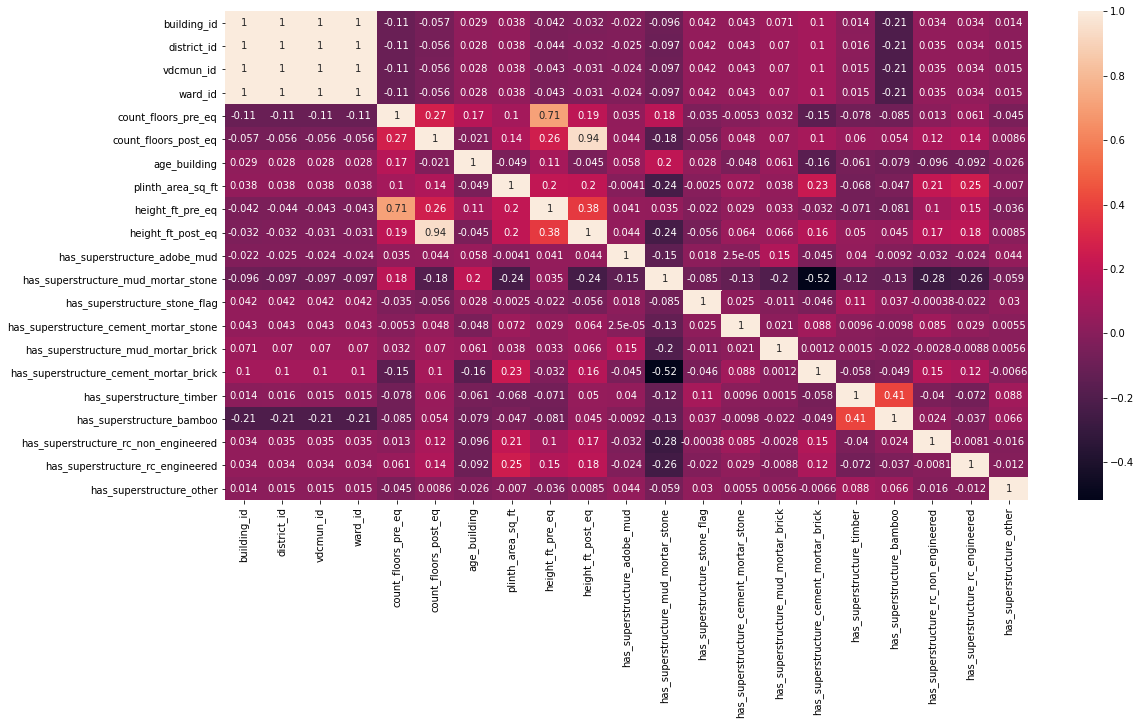

In [ ]:
## cek korelasi antar kolom numerikal
plt.figure(figsize=(18,9))
sns.heatmap(bui.corr(), annot=True)
plt.show()

In [ ]:
!pip install dython

In [ ]:
import dython
from dython.nominal import associations

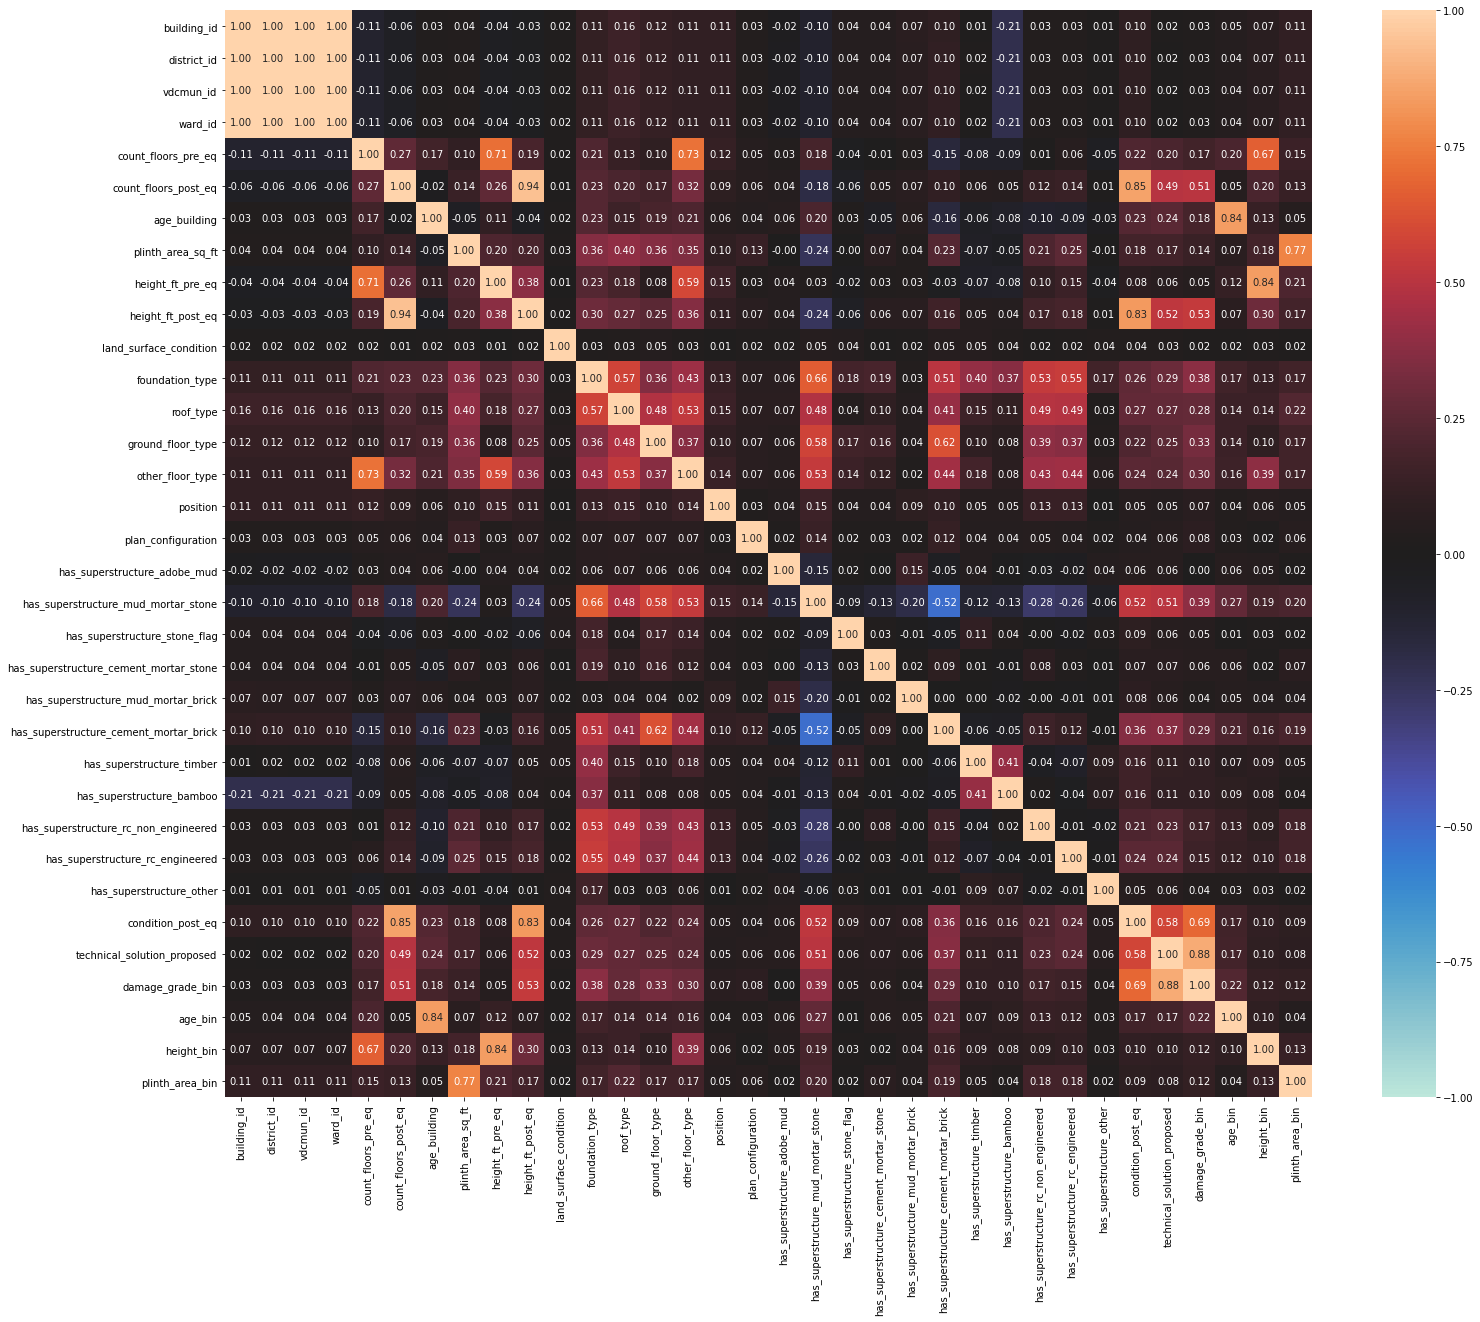

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7efbdc115a20>,
 'corr':                                         building_id  district_id  vdcmun_id  \
 building_id                                1.000000     0.999426   0.999447   
 district_id                                0.999426     1.000000   0.999983   
 vdcmun_id                                  0.999447     0.999983   1.000000   
 ward_id                                    0.999447     0.999983   1.000000   
 count_floors_pre_eq                       -0.107547    -0.108629  -0.108358   
 count_floors_post_eq                      -0.056814    -0.055657  -0.055540   
 age_building                               0.029129     0.027560   0.027940   
 plinth_area_sq_ft                          0.037847     0.037991   0.037590   
 height_ft_pre_eq                          -0.041808    -0.043519  -0.043230   
 height_ft_post_eq                         -0.032411    -0.031577  -0.031437   
 land_surface_condition                     0.

In [ ]:
# plt.figure(figsize=(14, 8))
associations(bui, figsize=(25,20))

- Sebelumnya saat EDA saya menemukan beberapa kolom yang multicollinearity yaitu 
  - kolom (district_id, vdcmun_id, dan ward_id) 
  - kolom (count_floors_pre_eq, count_floors_post_eq, height_ft_pre_eq, height_ft_post_eq)
  - kolom (damage_grade_bin, condition_post_eq, technical_solution_proposed)

- dari 3 kelompok tersebut saya akan gunakan kolom district_id, height_ft, dan damage_grade_bin

- Kemudian kolom lainnya saya pilih berdasarkan domain knowledge

In [ ]:
df = bui[['foundation_type', 'roof_type', 'ground_floor_type', 'age_building', 'height_ft_pre_eq', 'plinth_area_sq_ft', 'damage_grade_bin']]

In [ ]:
df.head()

,foundation_type,roof_type,ground_floor_type,age_building,height_ft_pre_eq,plinth_area_sq_ft,damage_grade_bin
0,Other,Bamboo/Timber-Light roof,Mud,9,9,288,Low-Risk
1,Other,Bamboo/Timber-Light roof,Mud,15,9,364,High-Risk
2,Other,Bamboo/Timber-Light roof,Mud,20,9,384,Low-Risk
3,Other,Bamboo/Timber-Light roof,Mud,20,9,312,Low-Risk
4,Other,Bamboo/Timber-Light roof,Mud,30,9,308,Low-Risk


In [ ]:
df.shape

(756276, 7)

In [ ]:
df.head()

,foundation_type,roof_type,ground_floor_type,age_building,height_ft_pre_eq,plinth_area_sq_ft,damage_grade_bin
0,Other,Bamboo/Timber-Light roof,Mud,9,9,288,Low-Risk
1,Other,Bamboo/Timber-Light roof,Mud,15,9,364,High-Risk
2,Other,Bamboo/Timber-Light roof,Mud,20,9,384,Low-Risk
3,Other,Bamboo/Timber-Light roof,Mud,20,9,312,Low-Risk
4,Other,Bamboo/Timber-Light roof,Mud,30,9,308,Low-Risk


### Sampling

- Karena sebelumnya saya sudah mencoba membuat base model dengan full data (756276 row) ternyata membutuhkan waktu .fit yang sangat lama, dan keterbatasan spesifikasi laptop saya. Maka saya memutuskan untuk mengambil sampel dari data ini. Saya menggunakan stratified sampling agar sampel yang saya ambil dari kelas low-risk dan kelas high-risk memiliki perbandingan yang seimbang.
Stratified sampling memiliki rumus:

group sample size = (group population / total population) x ideal sample size

saya cek ideal sampel size melalui https://www.qualtrics.com/blog/calculating-sample-size/
dengan kriteria:
  - Confidence-level: 99%
  - Population: 756276
  - Margin of error: 1%
  - Menghasilkan ideal sample size: 16222

In [ ]:
## cek jumlah sampel yg harus di ambil dari kelas high-risk
print((len(df[df['damage_grade_bin'] == 'High-Risk']) / len(df.index)) * 16222)

## cek jumlah sampel yg harus di ambil dari kelas low-risk
print((len(df[df['damage_grade_bin'] == 'Low-Risk']) / len(df.index)) * 16222)

## cari value fraction 
print(16222 / len(df.index))

9801.848071339035
6420.1519286609655
0.02144984106331551


In [ ]:
## sampling
sample_df = df.groupby('damage_grade_bin').apply(lambda x: x.sample(frac=0.05))
## saya menggunakan fraction sebesar 0.05 untuk menambah jumlah data

In [ ]:
## cek perbandingan damage_grade_bin = high-risk dalam data populasi dan sampel
print(len(df[df['damage_grade_bin'] == 'High-Risk']) / len(df.index))
print(len(sample_df[sample_df['damage_grade_bin'] == 'High-Risk']) / len(sample_df.index))

0.604231788394713
0.6042206590151795


In [ ]:
sample_df.head()

foundation_type                 roof_type  \
damage_grade_bin                                                            
High-Risk        348694  Mud mortar-Stone/Brick  Bamboo/Timber-Light roof   
                 56605            Bamboo/Timber  Bamboo/Timber-Heavy roof   
                 489367  Mud mortar-Stone/Brick  Bamboo/Timber-Light roof   
                 121763  Mud mortar-Stone/Brick  Bamboo/Timber-Light roof   
                 514624  Mud mortar-Stone/Brick  Bamboo/Timber-Light roof   

                        ground_floor_type  age_building  height_ft_pre_eq  \
damage_grade_bin                                                            
High-Risk        348694               Mud            16                14   
                 56605                Mud            30                16   
                 489367               Mud             1                 8   
                 121763               Mud            25                20   
                 514624       Brick/Stone             7                18   

                         plinth_area_sq_ft damage_grade_bin  
damage_grade_bin                                             
High-Risk        348694                198        High-Risk  
                 56605                 345        High-Risk  
                 489367                590        High-Risk  
                 121763                420        High-Risk  
                 514624                223        High-Risk

In [ ]:
sample_df.reset_index(drop=True, inplace=True)

In [ ]:
sample_df.head()

,foundation_type,roof_type,ground_floor_type,age_building,height_ft_pre_eq,plinth_area_sq_ft,damage_grade_bin
0,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,16,14,198,High-Risk
1,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,30,16,345,High-Risk
2,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,1,8,590,High-Risk
3,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,25,20,420,High-Risk
4,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,7,18,223,High-Risk


In [ ]:
sample_df.shape

(37814, 7)

In [ ]:
sample_df['damage_grade_bin'].value_counts()

High-Risk    22848
Low-Risk     14966
Name: damage_grade_bin, dtype: int64

In [ ]:
sample_df['damage_grade_bin'].value_counts(normalize=True)*100

High-Risk    60.422066
Low-Risk     39.577934
Name: damage_grade_bin, dtype: float64

In [ ]:
## Encode target
sample_df['damage_grade'] = sample_df['damage_grade_bin'].map({'Low-Risk':0, 'High-Risk':1})

In [ ]:
sample_df.drop(columns='damage_grade_bin', inplace=True)

In [ ]:
sample_df.head()

,foundation_type,roof_type,ground_floor_type,age_building,height_ft_pre_eq,plinth_area_sq_ft,damage_grade
0,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,16,14,198,1
1,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,30,16,345,1
2,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,1,8,590,1
3,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,25,20,420,1
4,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,7,18,223,1


### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
X = sample_df.drop(columns='damage_grade')
y = sample_df['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size =.80, random_state=42)

In [ ]:
X_train.head()

,foundation_type,roof_type,ground_floor_type,age_building,height_ft_pre_eq,plinth_area_sq_ft
32774,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,11,12,400
33815,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,7,20,238
33068,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,RC,22,21,375
4371,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,82,10,180
30192,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,80,17,410


In [ ]:
X_test.head()

,foundation_type,roof_type,ground_floor_type,age_building,height_ft_pre_eq,plinth_area_sq_ft
30978,RC,RCC/RB/RBC,RC,7,18,791
12102,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,5,7,240
27984,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,75,6,284
35056,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,5,18,400
1238,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,9,16,300


## Machine Learning use Pipeline

In [ ]:
cat_columns=['foundation_type', 'roof_type', 'ground_floor_type']
num_columns = ['age_building', 'height_ft_pre_eq', 'plinth_area_sq_ft']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

### Logistic Regression + Standard Scaler

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])


categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

pipe_lr = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

In [ ]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age_building',
                                                   'height_ft_pre_eq',
                                                   'pli

In [ ]:
y_lr = pipe_lr.predict(X_test)
y_train_lr = pipe_lr.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_lr))

              precision    recall  f1-score   support

           0       0.81      0.38      0.52     11973
           1       0.70      0.94      0.80     18278

    accuracy                           0.72     30251
   macro avg       0.76      0.66      0.66     30251
weighted avg       0.74      0.72      0.69     30251



In [ ]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52      2993
           1       0.70      0.94      0.80      4570

    accuracy                           0.72      7563
   macro avg       0.75      0.66      0.66      7563
weighted avg       0.74      0.72      0.69      7563



In [ ]:
cm = confusion_matrix(y_train, y_train_lr, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,17202,1076
Akt 0,7373,4600


In [ ]:
cm = confusion_matrix(y_test, y_lr, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,4286,284
Akt 0,1836,1157


### Logistic Regression + Robust Scaler

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])


categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

pipe_lr_rob = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

In [ ]:
pipe_lr_rob.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   RobustScaler(copy=True,
                                                                                quantile_range=(25.0,
                                                                                                75.0),
                                                                                with_centering=True,
                                                                                with_scaling=True))],
                                                           v

In [ ]:
y_rob_lr = pipe_lr_rob.predict(X_test)
y_train_rob_lr = pipe_lr_rob.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_rob_lr))

              precision    recall  f1-score   support

           0       0.81      0.38      0.52     11973
           1       0.70      0.94      0.80     18278

    accuracy                           0.72     30251
   macro avg       0.76      0.66      0.66     30251
weighted avg       0.74      0.72      0.69     30251



In [ ]:
print(classification_report(y_test, y_rob_lr))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52      2993
           1       0.70      0.94      0.80      4570

    accuracy                           0.72      7563
   macro avg       0.75      0.66      0.66      7563
weighted avg       0.74      0.72      0.69      7563



In [ ]:
cm = confusion_matrix(y_train, y_train_rob_lr, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,17202,1076
Akt 0,7373,4600


In [ ]:
cm = confusion_matrix(y_test, y_rob_lr, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,4286,284
Akt 0,1836,1157


### KNN + Standard Scaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])


categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

pipe_knn = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

In [ ]:
pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age_building',
                                                   'height_ft_pre_eq',
                                                   'pli

In [ ]:
y_knn = pipe_knn.predict(X_test)
y_train_knn = pipe_knn.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_knn))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68     11973
           1       0.77      0.88      0.83     18278

    accuracy                           0.77     30251
   macro avg       0.77      0.74      0.75     30251
weighted avg       0.77      0.77      0.77     30251



In [ ]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54      2993
           1       0.70      0.80      0.75      4570

    accuracy                           0.68      7563
   macro avg       0.66      0.64      0.65      7563
weighted avg       0.67      0.68      0.67      7563



In [ ]:
cm = confusion_matrix(y_train, y_train_knn, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,16169,2109
Akt 0,4736,7237


In [ ]:
cm = confusion_matrix(y_test, y_knn, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,3671,899
Akt 0,1543,1450


### KNN + Robust Scaler

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])


categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

pipe_knn_rob = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

In [ ]:
pipe_knn_rob.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   RobustScaler(copy=True,
                                                                                quantile_range=(25.0,
                                                                                                75.0),
                                                                                with_centering=True,
                                                                                with_scaling=True))],
                                                           v

In [ ]:
y_rob_knn = pipe_knn_rob.predict(X_test)
y_train_rob_knn = pipe_knn_rob.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_rob_knn))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68     11973
           1       0.77      0.89      0.83     18278

    accuracy                           0.77     30251
   macro avg       0.78      0.75      0.75     30251
weighted avg       0.78      0.77      0.77     30251



In [ ]:
print(classification_report(y_test, y_rob_knn))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54      2993
           1       0.70      0.81      0.75      4570

    accuracy                           0.68      7563
   macro avg       0.66      0.64      0.65      7563
weighted avg       0.67      0.68      0.67      7563



In [ ]:
cm = confusion_matrix(y_train, y_train_rob_knn, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,16205,2073
Akt 0,4735,7238


In [ ]:
cm = confusion_matrix(y_test, y_rob_knn, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,3693,877
Akt 0,1558,1435


### Random Forest + Standard Scaler

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])


categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

pipe_rf = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

In [ ]:
pipe_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age_building',
                                                   'height_ft_pre_eq',
                                                   'pli

In [ ]:
y_rf = pipe_rf.predict(X_test)
y_train_rf = pipe_rf.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_rf))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11973
           1       0.96      0.98      0.97     18278

    accuracy                           0.97     30251
   macro avg       0.97      0.96      0.97     30251
weighted avg       0.97      0.97      0.97     30251



In [ ]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55      2993
           1       0.71      0.76      0.73      4570

    accuracy                           0.66      7563
   macro avg       0.65      0.64      0.64      7563
weighted avg       0.66      0.66      0.66      7563



In [ ]:
cm = confusion_matrix(y_train, y_train_rf, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,17968,310
Akt 0,690,11283


In [ ]:
cm = confusion_matrix(y_test, y_rf, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,3480,1090
Akt 0,1448,1545


### Random Forest + Robust Scaler

In [ ]:
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])


categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

pipe_rf_rob = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

In [ ]:
pipe_rf_rob.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   RobustScaler(copy=True,
                                                                                quantile_range=(25.0,
                                                                                                75.0),
                                                                                with_centering=True,
                                                                                with_scaling=True))],
                                                           v

In [ ]:
y_rob_rf = pipe_rf_rob.predict(X_test)
y_train_rob_rf = pipe_rf_rob.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_rob_rf))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11973
           1       0.96      0.98      0.97     18278

    accuracy                           0.97     30251
   macro avg       0.97      0.96      0.97     30251
weighted avg       0.97      0.97      0.97     30251



In [ ]:
print(classification_report(y_test, y_rob_rf))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55      2993
           1       0.71      0.77      0.74      4570

    accuracy                           0.67      7563
   macro avg       0.65      0.64      0.64      7563
weighted avg       0.66      0.67      0.66      7563



In [ ]:
cm = confusion_matrix(y_train, y_train_rob_rf, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,17985,293
Akt 0,706,11267


In [ ]:
cm = confusion_matrix(y_test, y_rob_rf, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,3518,1052
Akt 0,1451,1542


### Evaluation Matrix

- Karena targetnya termasuk balance, saya menggunakan score accuracy

In [ ]:
ac_train_lr = accuracy_score(y_train, y_train_lr)
ac_train_lr_rob = accuracy_score(y_train, y_train_rob_lr)
ac_train_knn = accuracy_score(y_train, y_train_knn)
ac_train_knn_rob = accuracy_score(y_train, y_train_rob_knn)
ac_train_rf = accuracy_score(y_train, y_train_rf)
ac_train_rf_rob = accuracy_score(y_train, y_train_rob_rf)

ac_test_lr = accuracy_score(y_test, y_lr)
ac_test_lr_rob = accuracy_score(y_test, y_rob_lr)
ac_test_knn = accuracy_score(y_test, y_knn)
ac_test_knn_rob = accuracy_score(y_test, y_rob_knn)
ac_test_rf = accuracy_score(y_test, y_rf)
ac_test_rf_rob = accuracy_score(y_test, y_rob_rf)

em = {
    'accuracy_train' : [ac_train_lr, ac_train_lr_rob, ac_train_knn, ac_train_knn_rob, ac_train_rf, ac_train_rf_rob],
    'accuracy_test' : [ac_test_lr, ac_test_lr_rob, ac_test_knn, ac_test_knn_rob, ac_test_rf, ac_test_rf_rob]
}

em_base = pd.DataFrame(data=em, index=['LogReg + Standard Scaler', 'LogReg + Robust Scaler', 'KNN + Standard Scaler', 'KNN + Robust Scaler', 'RF + Standard Scaler', 'RF + Robust Scaler']).round(2)
em_base

,accuracy_train,accuracy_test
LogReg + Standard Scaler,0.72,0.72
LogReg + Robust Scaler,0.72,0.72
KNN + Standard Scaler,0.77,0.68
KNN + Robust Scaler,0.77,0.68
RF + Standard Scaler,0.97,0.66
RF + Robust Scaler,0.97,0.67


- Tidak ada perbedaan antara standard scaler dan robust scaler, untuk di hyperparameter tuning saya hanya menggunakan robust scaler

### Logistic Regression Tuned

In [ ]:
param_lr = {'algo__penalty': ['l2', 'l1', 'elasticnet'],
            'algo__C' : [1.0, 0.8, 0.6, 0.4, 0.2, 1.2, 1.4]}

In [ ]:
model_lr = GridSearchCV(estimator=pipe_lr_rob, param_grid=param_lr, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
model_lr.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    8.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          RobustScaler(copy=True,
                                                                                                       quantile_range=(25.0,
                                          

In [ ]:
model_lr.best_params_

{'algo__C': 0.6, 'algo__penalty': 'l2'}

In [ ]:
lr_tun = model_lr.best_estimator_
y_tun_lr = lr_tun.predict(X_test)
y_tun_train_lr = lr_tun.predict(X_train)

In [ ]:
print(classification_report(y_train, y_tun_train_lr))

              precision    recall  f1-score   support

           0       0.81      0.38      0.52     11973
           1       0.70      0.94      0.80     18278

    accuracy                           0.72     30251
   macro avg       0.76      0.66      0.66     30251
weighted avg       0.74      0.72      0.69     30251



In [ ]:
print(classification_report(y_test, y_tun_lr))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52      2993
           1       0.70      0.94      0.80      4570

    accuracy                           0.72      7563
   macro avg       0.75      0.66      0.66      7563
weighted avg       0.74      0.72      0.69      7563



In [ ]:
cm = confusion_matrix(y_train, y_tun_train_lr, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,17202,1076
Akt 0,7372,4601


In [ ]:
cm = confusion_matrix(y_test, y_tun_lr, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,4286,284
Akt 0,1835,1158


### KNN Tuned

In [ ]:
param_knn = {'algo__n_neighbors': [5, 10, 20, 30, 40 ,50, 60 ,70, 80, 90, 100, 110, 120, 130], 
             'algo__p': [1,2], 
             'algo__leaf_size': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]}

In [ ]:
model_knn = GridSearchCV(estimator=pipe_knn_rob, param_grid=param_knn, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
model_knn.fit(X_train, y_train)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 20.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prep',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          RobustScaler(copy=True,
                                                                                                       quantile_range=(25.0,
                                          

In [ ]:
model_knn.best_params_

{'algo__leaf_size': 20, 'algo__n_neighbors': 130, 'algo__p': 1}

In [ ]:
knn_tun = model_knn.best_estimator_
y_tun_knn = knn_tun.predict(X_test)
y_tun_train_knn = knn_tun.predict(X_train)

In [ ]:
print(classification_report(y_train, y_tun_train_knn))

              precision    recall  f1-score   support

           0       0.82      0.39      0.52     11973
           1       0.70      0.94      0.80     18278

    accuracy                           0.72     30251
   macro avg       0.76      0.66      0.66     30251
weighted avg       0.75      0.72      0.69     30251



In [ ]:
print(classification_report(y_test, y_tun_knn))

              precision    recall  f1-score   support

           0       0.81      0.39      0.53      2993
           1       0.70      0.94      0.80      4570

    accuracy                           0.72      7563
   macro avg       0.76      0.67      0.67      7563
weighted avg       0.75      0.72      0.69      7563



In [ ]:
cm = confusion_matrix(y_train, y_tun_train_lr, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,17202,1076
Akt 0,7372,4601


In [ ]:
cm = confusion_matrix(y_test, y_tun_lr, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,4286,284
Akt 0,1835,1158


### Random Forest Tuned

In [ ]:
param_rf = {'algo__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            'algo__max_features': ['auto', 'sqrt'],
            'algo__n_estimators': [100, 300, 500, 700, 900, 1100, 1300],
            'algo__min_samples_split': [2, 5, 10],
            'algo__min_samples_leaf' : [1, 2, 4]}

In [ ]:
model_rf = RandomizedSearchCV(estimator=pipe_rf_rob, param_distributions=param_rf, n_iter=100, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
model_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 50.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('prep',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('numeric',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('scaler',
                                                                                                RobustScaler(copy=True,
                                                                                                     

In [ ]:
model_rf.best_params_

{'algo__max_depth': 10,
 'algo__max_features': 'sqrt',
 'algo__min_samples_leaf': 2,
 'algo__min_samples_split': 10,
 'algo__n_estimators': 500}

In [ ]:
rf_tun = model_rf.best_estimator_
y_tun_rf = rf_tun.predict(X_test)
y_tun_train_rf = rf_tun.predict(X_train)

In [ ]:
print(classification_report(y_train, y_tun_train_rf))

              precision    recall  f1-score   support

           0       0.84      0.40      0.54     11973
           1       0.71      0.95      0.81     18278

    accuracy                           0.73     30251
   macro avg       0.77      0.67      0.67     30251
weighted avg       0.76      0.73      0.70     30251



In [ ]:
print(classification_report(y_test, y_tun_rf))

              precision    recall  f1-score   support

           0       0.81      0.39      0.52      2993
           1       0.70      0.94      0.80      4570

    accuracy                           0.72      7563
   macro avg       0.76      0.66      0.66      7563
weighted avg       0.75      0.72      0.69      7563



In [ ]:
cm = confusion_matrix(y_train, y_tun_train_rf, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,17381,897
Akt 0,7227,4746


In [ ]:
cm = confusion_matrix(y_test, y_tun_rf, labels=[1, 0])
pd.DataFrame(data=cm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,4304,266
Akt 0,1834,1159


### Evaluation Matrix Tuned

In [ ]:
ac_train_lr = accuracy_score(y_train, y_tun_train_lr)
ac_train_knn = accuracy_score(y_train, y_tun_train_knn)
ac_train_rf = accuracy_score(y_train, y_tun_train_rf)

ac_test_lr = accuracy_score(y_test, y_tun_lr)
ac_test_knn = accuracy_score(y_test, y_tun_knn)
ac_test_rf = accuracy_score(y_test, y_tun_rf)

em = {
    'accuracy_train' : [ac_train_lr, ac_train_knn, ac_train_rf],
    'accuracy_test' : [ac_test_lr, ac_test_knn, ac_test_rf]
}

em_tun = pd.DataFrame(data=em, index=['LogReg_tuned_robust', 'KNN_tuned_robust', 'RF_tuned_robust']).round(2)
em_tun ## tuned model

,accuracy_train,accuracy_test
LogReg_tuned_robust,0.72,0.72
KNN_tuned_robust,0.72,0.72
RF_tuned_robust,0.73,0.72


In [ ]:
em_base ## base model

,accuracy_train,accuracy_test
LogReg + Standard Scaler,0.72,0.72
LogReg + Robust Scaler,0.72,0.72
KNN + Standard Scaler,0.77,0.68
KNN + Robust Scaler,0.77,0.68
RF + Standard Scaler,0.97,0.66
RF + Robust Scaler,0.97,0.67


### Kesimpulan

- Hasil evaluation matrix logistic regression tampak tidak ada perubahan antara base model dan tuned model

- Hasil evaluation matrix KNN sebelum tuning adalah overfit, setelah tuning menjadi fit di angka 0.72

- Hasil evaluation matrix random forest sebelum tuning adalah overfit, cukup jauh antara train dan test nya. Setelah tuning hasilnya masih overfit dengan angka 0.73 untuk train dan 0.72 untuk test

- Untuk di eksport saya memilih model logistic regression yang sudah tuning (model_lr)

- Ada input, dalam memilih evaluation matrix tidak melulu melihat targetnya balance atau tidak. Tetapi perlu didasarkan pada bisnis problem yang ingin diselesaikan. Saya sangat setuju mengenai masukan ini dan baru menyadarinya juga. Saat ini dalam kasus ini jika ditelaah lagi, menebak rumah yang memiliki kerusakan high risk sangat penting karena kerusakan high risk lebih berbahaya dibandingkan low risk. Dalam aspek biaya, kerusakan high risk membutuhkan biaya lebih besar untuk rekonstruksi ulang, Pemerintah Nepal belum tentu bisa meng-cover semuanya, makanya perlu direncanakan, apakah bisa dicover pemerintah semuanya, atau perlu program disaster risk financing yang melibatkan pihak lain seperti World Bank, ADB, asuransi, reasuransi dan capital market

In [ ]:
## coba predict data baru
data_build1 = [{
    'foundation_type' : 'Mud mortar-Stone/Brick',
    'roof_type': 'Bamboo/Timber-Light roof',
    'ground_floor_type': 'RC',
    'age_building': 28,
    'height_ft_pre_eq': 20,
    'plinth_area_sq_ft': 75,
}]
build1 = pd.DataFrame(data_build1, index=[1])

In [ ]:
model_lr.predict(build1)[0]

0

## Eksport Model

In [ ]:
import joblib

In [ ]:
filename = 'model_lr.sav'
joblib.dump(model_lr, filename)

['model_lr.sav']